In [1]:
import sys
import torch
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Add the src folder to the Python path to allow for module imports
sys.path.append('../src')

from train import train
from data_setup import create_logo_dataloaders
from model import SpectrogramResNet

c:\Users\ayush\miniconda3\envs\audio-mlops\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Define the main configuration for all training runs
CONFIG = {
    "data_dir": "../data/processed/fan",    # Path to the single, nested processed data folder
    "model_dir": "../models",               # Directory where all models are saved
    "image_size": (224, 224),
    "dropout_rate": 0.4,
    "batch_size": 32,
    "num_epochs": 100,                      
    "learning_rate": 1e-4,
    "patience": 15                          # Patience for early stopping
}

# Define the fan IDs for the LOGO cross-validation
ALL_FAN_IDS = ['id_00', 'id_02', 'id_04', 'id_06']

In [ ]:
# This dictionary will store the training history for each fold
all_histories = {}

# Loop through each fan ID, holding one out as the test set in each iteration
for test_id in ALL_FAN_IDS:
    # The train function takes the test_id and handles the data splitting
    history_df = train(config=CONFIG, test_fan_id=test_id)
    all_histories[test_id] = history_df

print("\n--- Full LOGO Cross-Validation Training Complete ---")
print(f"Four models have been saved in the '{CONFIG['model_dir']}' directory.")


--- Training Fold | Test Fan: id_00 | Device: cuda ---
[INFO] Hold-out Test Fan: id_00
[INFO] Training images: 3305
[INFO] Validation images: 827
[INFO] Test images: 1418


c:\Users\ayush\miniconda3\envs\audio-mlops\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] Abnormal weight for this fold: 2.87


Validation: 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]



Epoch: 1 | Train Loss: 0.8399 | Train Acc: 0.7383 | Train F1: 0.8491 | Val Loss: 0.7621 | Val Acc: 0.7412 | Val F1: 0.8514 | Val Precision: 0.7412 | Val Recall: 1.0000
Validation loss decreased (inf --> 0.762064). Saving model...


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.39it/s]



Epoch: 2 | Train Loss: 0.6880 | Train Acc: 0.7422 | Train F1: 0.8519 | Val Loss: 0.6642 | Val Acc: 0.7412 | Val F1: 0.8514 | Val Precision: 0.7412 | Val Recall: 1.0000
Validation loss decreased (0.762064 --> 0.664182). Saving model...


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.33it/s]



Epoch: 3 | Train Loss: 0.5716 | Train Acc: 0.7731 | Train F1: 0.8671 | Val Loss: 0.5571 | Val Acc: 0.8089 | Val F1: 0.8853 | Val Precision: 0.7974 | Val Recall: 0.9951
Validation loss decreased (0.664182 --> 0.557094). Saving model...


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.33it/s]



Epoch: 4 | Train Loss: 0.4601 | Train Acc: 0.8345 | Train F1: 0.8992 | Val Loss: 0.4990 | Val Acc: 0.8404 | Val F1: 0.9009 | Val Precision: 0.8345 | Val Recall: 0.9788
Validation loss decreased (0.557094 --> 0.499001). Saving model...


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.26it/s]



Epoch: 5 | Train Loss: 0.3837 | Train Acc: 0.8663 | Train F1: 0.9166 | Val Loss: 0.4765 | Val Acc: 0.8368 | Val F1: 0.8987 | Val Precision: 0.8319 | Val Recall: 0.9772
Validation loss decreased (0.499001 --> 0.476485). Saving model...


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.37it/s]



Epoch: 6 | Train Loss: 0.3234 | Train Acc: 0.8932 | Train F1: 0.9323 | Val Loss: 0.4594 | Val Acc: 0.8803 | Val F1: 0.9226 | Val Precision: 0.8859 | Val Recall: 0.9625
Validation loss decreased (0.476485 --> 0.459383). Saving model...


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.45it/s]



Epoch: 7 | Train Loss: 0.2675 | Train Acc: 0.9123 | Train F1: 0.9437 | Val Loss: 0.4435 | Val Acc: 0.8948 | Val F1: 0.9314 | Val Precision: 0.9009 | Val Recall: 0.9641
Validation loss decreased (0.459383 --> 0.443458). Saving model...


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.30it/s]



Epoch: 8 | Train Loss: 0.2370 | Train Acc: 0.9259 | Train F1: 0.9520 | Val Loss: 0.4714 | Val Acc: 0.8694 | Val F1: 0.9178 | Val Precision: 0.8602 | Val Recall: 0.9837
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.35it/s]



Epoch: 9 | Train Loss: 0.2031 | Train Acc: 0.9401 | Train F1: 0.9609 | Val Loss: 0.4653 | Val Acc: 0.8815 | Val F1: 0.9252 | Val Precision: 0.8694 | Val Recall: 0.9886
EarlyStopping counter: 2 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.36it/s]



Epoch: 10 | Train Loss: 0.1783 | Train Acc: 0.9470 | Train F1: 0.9653 | Val Loss: 0.4420 | Val Acc: 0.8960 | Val F1: 0.9329 | Val Precision: 0.8939 | Val Recall: 0.9755
Validation loss decreased (0.443458 --> 0.441978). Saving model...


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.30it/s]



Epoch: 11 | Train Loss: 0.1735 | Train Acc: 0.9464 | Train F1: 0.9649 | Val Loss: 0.4857 | Val Acc: 0.8936 | Val F1: 0.9306 | Val Precision: 0.9008 | Val Recall: 0.9625
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.37it/s]



Epoch: 12 | Train Loss: 0.1382 | Train Acc: 0.9595 | Train F1: 0.9732 | Val Loss: 0.4595 | Val Acc: 0.9105 | Val F1: 0.9408 | Val Precision: 0.9231 | Val Recall: 0.9592
EarlyStopping counter: 2 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.29it/s]



Epoch: 13 | Train Loss: 0.1291 | Train Acc: 0.9640 | Train F1: 0.9762 | Val Loss: 0.5484 | Val Acc: 0.8936 | Val F1: 0.9308 | Val Precision: 0.8983 | Val Recall: 0.9657
EarlyStopping counter: 3 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.22it/s]



Epoch: 14 | Train Loss: 0.1381 | Train Acc: 0.9652 | Train F1: 0.9770 | Val Loss: 0.4920 | Val Acc: 0.8936 | Val F1: 0.9323 | Val Precision: 0.8821 | Val Recall: 0.9886
EarlyStopping counter: 4 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.22it/s]



Epoch: 15 | Train Loss: 0.1263 | Train Acc: 0.9694 | Train F1: 0.9797 | Val Loss: 0.4739 | Val Acc: 0.8863 | Val F1: 0.9270 | Val Precision: 0.8844 | Val Recall: 0.9739
EarlyStopping counter: 5 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.42it/s]



Epoch: 16 | Train Loss: 0.1132 | Train Acc: 0.9634 | Train F1: 0.9758 | Val Loss: 0.4620 | Val Acc: 0.9021 | Val F1: 0.9369 | Val Precision: 0.8970 | Val Recall: 0.9804
EarlyStopping counter: 6 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.39it/s]



Epoch: 17 | Train Loss: 0.0939 | Train Acc: 0.9728 | Train F1: 0.9819 | Val Loss: 0.5025 | Val Acc: 0.8924 | Val F1: 0.9295 | Val Precision: 0.9031 | Val Recall: 0.9576
EarlyStopping counter: 7 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.43it/s]



Epoch: 18 | Train Loss: 0.0840 | Train Acc: 0.9767 | Train F1: 0.9845 | Val Loss: 0.4413 | Val Acc: 0.9081 | Val F1: 0.9402 | Val Precision: 0.9087 | Val Recall: 0.9739
Validation loss decreased (0.441978 --> 0.441320). Saving model...


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.41it/s]



Epoch: 19 | Train Loss: 0.0791 | Train Acc: 0.9770 | Train F1: 0.9847 | Val Loss: 0.5258 | Val Acc: 0.8984 | Val F1: 0.9336 | Val Precision: 0.9051 | Val Recall: 0.9641
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.48it/s]



Epoch: 20 | Train Loss: 0.0888 | Train Acc: 0.9764 | Train F1: 0.9842 | Val Loss: 0.4783 | Val Acc: 0.9008 | Val F1: 0.9361 | Val Precision: 0.8957 | Val Recall: 0.9804
EarlyStopping counter: 2 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.33it/s]



Epoch: 21 | Train Loss: 0.0806 | Train Acc: 0.9764 | Train F1: 0.9843 | Val Loss: 0.5046 | Val Acc: 0.8960 | Val F1: 0.9324 | Val Precision: 0.8998 | Val Recall: 0.9674
EarlyStopping counter: 3 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.45it/s]



Epoch: 22 | Train Loss: 0.0759 | Train Acc: 0.9809 | Train F1: 0.9873 | Val Loss: 0.4791 | Val Acc: 0.9045 | Val F1: 0.9385 | Val Precision: 0.8973 | Val Recall: 0.9837
EarlyStopping counter: 4 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.33it/s]



Epoch: 23 | Train Loss: 0.0956 | Train Acc: 0.9737 | Train F1: 0.9825 | Val Loss: 0.4993 | Val Acc: 0.9033 | Val F1: 0.9371 | Val Precision: 0.9044 | Val Recall: 0.9723
EarlyStopping counter: 5 out of 15


Validation: 100%|██████████| 26/26 [00:05<00:00,  4.33it/s]



Epoch: 24 | Train Loss: 0.0755 | Train Acc: 0.9785 | Train F1: 0.9857 | Val Loss: 0.4991 | Val Acc: 0.8996 | Val F1: 0.9344 | Val Precision: 0.9064 | Val Recall: 0.9641
EarlyStopping counter: 6 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.27it/s]



Epoch: 25 | Train Loss: 0.0753 | Train Acc: 0.9779 | Train F1: 0.9853 | Val Loss: 0.4688 | Val Acc: 0.9117 | Val F1: 0.9424 | Val Precision: 0.9128 | Val Recall: 0.9739
EarlyStopping counter: 7 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.17it/s]



Epoch: 26 | Train Loss: 0.0658 | Train Acc: 0.9825 | Train F1: 0.9883 | Val Loss: 0.4632 | Val Acc: 0.9141 | Val F1: 0.9438 | Val Precision: 0.9169 | Val Recall: 0.9723
EarlyStopping counter: 8 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.19it/s]



Epoch: 27 | Train Loss: 0.0771 | Train Acc: 0.9828 | Train F1: 0.9885 | Val Loss: 0.5173 | Val Acc: 0.8948 | Val F1: 0.9318 | Val Precision: 0.8973 | Val Recall: 0.9690
EarlyStopping counter: 9 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.21it/s]



Epoch: 28 | Train Loss: 0.0698 | Train Acc: 0.9812 | Train F1: 0.9875 | Val Loss: 0.4722 | Val Acc: 0.9081 | Val F1: 0.9401 | Val Precision: 0.9099 | Val Recall: 0.9723
EarlyStopping counter: 10 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]



Epoch: 29 | Train Loss: 0.0767 | Train Acc: 0.9788 | Train F1: 0.9859 | Val Loss: 0.5179 | Val Acc: 0.8996 | Val F1: 0.9343 | Val Precision: 0.9077 | Val Recall: 0.9625
EarlyStopping counter: 11 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.23it/s]



Epoch: 30 | Train Loss: 0.0790 | Train Acc: 0.9806 | Train F1: 0.9871 | Val Loss: 0.4990 | Val Acc: 0.9008 | Val F1: 0.9357 | Val Precision: 0.9005 | Val Recall: 0.9739
EarlyStopping counter: 12 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]



Epoch: 31 | Train Loss: 0.0725 | Train Acc: 0.9815 | Train F1: 0.9877 | Val Loss: 0.4886 | Val Acc: 0.9069 | Val F1: 0.9391 | Val Precision: 0.9110 | Val Recall: 0.9690
EarlyStopping counter: 13 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]



Epoch: 32 | Train Loss: 0.0748 | Train Acc: 0.9803 | Train F1: 0.9869 | Val Loss: 0.4959 | Val Acc: 0.9129 | Val F1: 0.9433 | Val Precision: 0.9117 | Val Recall: 0.9772
EarlyStopping counter: 14 out of 15


Validation: 100%|██████████| 26/26 [00:06<00:00,  4.19it/s]



Epoch: 33 | Train Loss: 0.0792 | Train Acc: 0.9782 | Train F1: 0.9855 | Val Loss: 0.5219 | Val Acc: 0.8948 | Val F1: 0.9317 | Val Precision: 0.8985 | Val Recall: 0.9674
EarlyStopping counter: 15 out of 15
Early stopping triggered.

--- Training Fold | Test Fan: id_02 | Device: cuda ---
[INFO] Hold-out Test Fan: id_02
[INFO] Training images: 3340
[INFO] Validation images: 835
[INFO] Test images: 1375


c:\Users\ayush\miniconda3\envs\audio-mlops\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] Abnormal weight for this fold: 2.74


Validation: 100%|██████████| 27/27 [00:12<00:00,  2.20it/s]



Epoch: 1 | Train Loss: 0.8170 | Train Acc: 0.7311 | Train F1: 0.8446 | Val Loss: 0.7559 | Val Acc: 0.7329 | Val F1: 0.8459 | Val Precision: 0.7329 | Val Recall: 1.0000
Validation loss decreased (inf --> 0.755885). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.17it/s]



Epoch: 2 | Train Loss: 0.6869 | Train Acc: 0.7380 | Train F1: 0.8483 | Val Loss: 0.6742 | Val Acc: 0.7617 | Val F1: 0.8600 | Val Precision: 0.7553 | Val Recall: 0.9984
Validation loss decreased (0.755885 --> 0.674235). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.31it/s]



Epoch: 3 | Train Loss: 0.6025 | Train Acc: 0.7713 | Train F1: 0.8648 | Val Loss: 0.6133 | Val Acc: 0.7844 | Val F1: 0.8714 | Val Precision: 0.7741 | Val Recall: 0.9967
Validation loss decreased (0.674235 --> 0.613303). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.32it/s]



Epoch: 4 | Train Loss: 0.5171 | Train Acc: 0.8123 | Train F1: 0.8860 | Val Loss: 0.5457 | Val Acc: 0.8108 | Val F1: 0.8845 | Val Precision: 0.8003 | Val Recall: 0.9886
Validation loss decreased (0.613303 --> 0.545658). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.25it/s]



Epoch: 5 | Train Loss: 0.4242 | Train Acc: 0.8425 | Train F1: 0.9025 | Val Loss: 0.5817 | Val Acc: 0.8156 | Val F1: 0.8874 | Val Precision: 0.8029 | Val Recall: 0.9918
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.12it/s]



Epoch: 6 | Train Loss: 0.3806 | Train Acc: 0.8674 | Train F1: 0.9163 | Val Loss: 0.4988 | Val Acc: 0.8515 | Val F1: 0.9062 | Val Precision: 0.8437 | Val Recall: 0.9788
Validation loss decreased (0.545658 --> 0.498822). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]



Epoch: 7 | Train Loss: 0.3495 | Train Acc: 0.8844 | Train F1: 0.9262 | Val Loss: 0.4683 | Val Acc: 0.8647 | Val F1: 0.9145 | Val Precision: 0.8519 | Val Recall: 0.9869
Validation loss decreased (0.498822 --> 0.468252). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.38it/s]



Epoch: 8 | Train Loss: 0.2948 | Train Acc: 0.9009 | Train F1: 0.9360 | Val Loss: 0.4990 | Val Acc: 0.8683 | Val F1: 0.9164 | Val Precision: 0.8565 | Val Recall: 0.9853
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.20it/s]



Epoch: 9 | Train Loss: 0.2792 | Train Acc: 0.9063 | Train F1: 0.9392 | Val Loss: 0.4560 | Val Acc: 0.8814 | Val F1: 0.9238 | Val Precision: 0.8734 | Val Recall: 0.9804
Validation loss decreased (0.468252 --> 0.456046). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]



Epoch: 10 | Train Loss: 0.2683 | Train Acc: 0.9162 | Train F1: 0.9455 | Val Loss: 0.4811 | Val Acc: 0.8790 | Val F1: 0.9222 | Val Precision: 0.8719 | Val Recall: 0.9788
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.37it/s]



Epoch: 11 | Train Loss: 0.2207 | Train Acc: 0.9284 | Train F1: 0.9531 | Val Loss: 0.5399 | Val Acc: 0.8814 | Val F1: 0.9234 | Val Precision: 0.8767 | Val Recall: 0.9755
EarlyStopping counter: 2 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.35it/s]



Epoch: 12 | Train Loss: 0.1990 | Train Acc: 0.9377 | Train F1: 0.9589 | Val Loss: 0.5430 | Val Acc: 0.8826 | Val F1: 0.9243 | Val Precision: 0.8768 | Val Recall: 0.9771
EarlyStopping counter: 3 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.30it/s]



Epoch: 13 | Train Loss: 0.2055 | Train Acc: 0.9413 | Train F1: 0.9612 | Val Loss: 0.4794 | Val Acc: 0.8850 | Val F1: 0.9253 | Val Precision: 0.8828 | Val Recall: 0.9722
EarlyStopping counter: 4 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.31it/s]



Epoch: 14 | Train Loss: 0.1833 | Train Acc: 0.9407 | Train F1: 0.9608 | Val Loss: 0.5250 | Val Acc: 0.8862 | Val F1: 0.9262 | Val Precision: 0.8830 | Val Recall: 0.9739
EarlyStopping counter: 5 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.21it/s]



Epoch: 15 | Train Loss: 0.1692 | Train Acc: 0.9497 | Train F1: 0.9666 | Val Loss: 0.5533 | Val Acc: 0.8850 | Val F1: 0.9258 | Val Precision: 0.8783 | Val Recall: 0.9788
EarlyStopping counter: 6 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.31it/s]



Epoch: 16 | Train Loss: 0.1310 | Train Acc: 0.9593 | Train F1: 0.9729 | Val Loss: 0.5671 | Val Acc: 0.8814 | Val F1: 0.9234 | Val Precision: 0.8767 | Val Recall: 0.9755
EarlyStopping counter: 7 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.40it/s]



Epoch: 17 | Train Loss: 0.1240 | Train Acc: 0.9635 | Train F1: 0.9756 | Val Loss: 0.5916 | Val Acc: 0.8874 | Val F1: 0.9270 | Val Precision: 0.8831 | Val Recall: 0.9755
EarlyStopping counter: 8 out of 15


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.65it/s]



Epoch: 18 | Train Loss: 0.1367 | Train Acc: 0.9593 | Train F1: 0.9728 | Val Loss: 0.5759 | Val Acc: 0.8874 | Val F1: 0.9274 | Val Precision: 0.8798 | Val Recall: 0.9804
EarlyStopping counter: 9 out of 15


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.54it/s]



Epoch: 19 | Train Loss: 0.1202 | Train Acc: 0.9602 | Train F1: 0.9734 | Val Loss: 0.5694 | Val Acc: 0.8850 | Val F1: 0.9253 | Val Precision: 0.8828 | Val Recall: 0.9722
EarlyStopping counter: 10 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.47it/s]



Epoch: 20 | Train Loss: 0.1310 | Train Acc: 0.9593 | Train F1: 0.9729 | Val Loss: 0.5681 | Val Acc: 0.8862 | Val F1: 0.9261 | Val Precision: 0.8841 | Val Recall: 0.9722
EarlyStopping counter: 11 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.48it/s]



Epoch: 21 | Train Loss: 0.1352 | Train Acc: 0.9581 | Train F1: 0.9720 | Val Loss: 0.5914 | Val Acc: 0.8862 | Val F1: 0.9256 | Val Precision: 0.8887 | Val Recall: 0.9657
EarlyStopping counter: 12 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.45it/s]



Epoch: 22 | Train Loss: 0.1236 | Train Acc: 0.9644 | Train F1: 0.9762 | Val Loss: 0.5658 | Val Acc: 0.8826 | Val F1: 0.9236 | Val Precision: 0.8836 | Val Recall: 0.9673
EarlyStopping counter: 13 out of 15


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.56it/s]



Epoch: 23 | Train Loss: 0.1261 | Train Acc: 0.9656 | Train F1: 0.9770 | Val Loss: 0.5717 | Val Acc: 0.8922 | Val F1: 0.9296 | Val Precision: 0.8919 | Val Recall: 0.9706
EarlyStopping counter: 14 out of 15


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.51it/s]



Epoch: 24 | Train Loss: 0.1416 | Train Acc: 0.9611 | Train F1: 0.9739 | Val Loss: 0.5817 | Val Acc: 0.8874 | Val F1: 0.9262 | Val Precision: 0.8912 | Val Recall: 0.9641
EarlyStopping counter: 15 out of 15
Early stopping triggered.

--- Training Fold | Test Fan: id_04 | Device: cuda ---
[INFO] Hold-out Test Fan: id_04
[INFO] Training images: 3335
[INFO] Validation images: 834
[INFO] Test images: 1381


c:\Users\ayush\miniconda3\envs\audio-mlops\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] Abnormal weight for this fold: 2.70


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.67it/s]



Epoch: 1 | Train Loss: 0.8331 | Train Acc: 0.7268 | Train F1: 0.8415 | Val Loss: 0.7517 | Val Acc: 0.7302 | Val F1: 0.8441 | Val Precision: 0.7302 | Val Recall: 1.0000
Validation loss decreased (inf --> 0.751691). Saving model...


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.62it/s]



Epoch: 2 | Train Loss: 0.7257 | Train Acc: 0.7295 | Train F1: 0.8436 | Val Loss: 0.6845 | Val Acc: 0.7314 | Val F1: 0.8447 | Val Precision: 0.7311 | Val Recall: 1.0000
Validation loss decreased (0.751691 --> 0.684461). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.48it/s]



Epoch: 3 | Train Loss: 0.6234 | Train Acc: 0.7451 | Train F1: 0.8512 | Val Loss: 0.5977 | Val Acc: 0.7566 | Val F1: 0.8571 | Val Precision: 0.7500 | Val Recall: 1.0000
Validation loss decreased (0.684461 --> 0.597657). Saving model...


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.61it/s]



Epoch: 4 | Train Loss: 0.5210 | Train Acc: 0.7967 | Train F1: 0.8775 | Val Loss: 0.5372 | Val Acc: 0.7914 | Val F1: 0.8748 | Val Precision: 0.7785 | Val Recall: 0.9984
Validation loss decreased (0.597657 --> 0.537249). Saving model...


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.59it/s]



Epoch: 5 | Train Loss: 0.4550 | Train Acc: 0.8306 | Train F1: 0.8953 | Val Loss: 0.4641 | Val Acc: 0.8309 | Val F1: 0.8956 | Val Precision: 0.8154 | Val Recall: 0.9934
Validation loss decreased (0.537249 --> 0.464135). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.33it/s]



Epoch: 6 | Train Loss: 0.3975 | Train Acc: 0.8567 | Train F1: 0.9099 | Val Loss: 0.4394 | Val Acc: 0.8501 | Val F1: 0.9058 | Val Precision: 0.8370 | Val Recall: 0.9869
Validation loss decreased (0.464135 --> 0.439396). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.23it/s]



Epoch: 7 | Train Loss: 0.3368 | Train Acc: 0.8768 | Train F1: 0.9216 | Val Loss: 0.4166 | Val Acc: 0.8729 | Val F1: 0.9185 | Val Precision: 0.8640 | Val Recall: 0.9803
Validation loss decreased (0.439396 --> 0.416550). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.30it/s]



Epoch: 8 | Train Loss: 0.3211 | Train Acc: 0.8867 | Train F1: 0.9271 | Val Loss: 0.4113 | Val Acc: 0.8705 | Val F1: 0.9172 | Val Precision: 0.8604 | Val Recall: 0.9819
Validation loss decreased (0.416550 --> 0.411265). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.42it/s]



Epoch: 9 | Train Loss: 0.2843 | Train Acc: 0.9070 | Train F1: 0.9396 | Val Loss: 0.4066 | Val Acc: 0.8645 | Val F1: 0.9139 | Val Precision: 0.8523 | Val Recall: 0.9852
Validation loss decreased (0.411265 --> 0.406594). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.18it/s]



Epoch: 10 | Train Loss: 0.2652 | Train Acc: 0.9076 | Train F1: 0.9398 | Val Loss: 0.4719 | Val Acc: 0.8573 | Val F1: 0.9098 | Val Precision: 0.8451 | Val Recall: 0.9852
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.10it/s]



Epoch: 11 | Train Loss: 0.2725 | Train Acc: 0.9169 | Train F1: 0.9456 | Val Loss: 0.4757 | Val Acc: 0.8621 | Val F1: 0.9132 | Val Precision: 0.8450 | Val Recall: 0.9934
EarlyStopping counter: 2 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.18it/s]



Epoch: 12 | Train Loss: 0.2305 | Train Acc: 0.9226 | Train F1: 0.9492 | Val Loss: 0.4482 | Val Acc: 0.8741 | Val F1: 0.9194 | Val Precision: 0.8631 | Val Recall: 0.9836
EarlyStopping counter: 3 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.36it/s]



Epoch: 13 | Train Loss: 0.1912 | Train Acc: 0.9439 | Train F1: 0.9628 | Val Loss: 0.4515 | Val Acc: 0.8861 | Val F1: 0.9261 | Val Precision: 0.8802 | Val Recall: 0.9770
EarlyStopping counter: 4 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.34it/s]



Epoch: 14 | Train Loss: 0.1922 | Train Acc: 0.9424 | Train F1: 0.9617 | Val Loss: 0.4555 | Val Acc: 0.8765 | Val F1: 0.9213 | Val Precision: 0.8614 | Val Recall: 0.9901
EarlyStopping counter: 5 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]



Epoch: 15 | Train Loss: 0.2011 | Train Acc: 0.9364 | Train F1: 0.9578 | Val Loss: 0.4916 | Val Acc: 0.8717 | Val F1: 0.9179 | Val Precision: 0.8617 | Val Recall: 0.9819
EarlyStopping counter: 6 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.22it/s]



Epoch: 16 | Train Loss: 0.1696 | Train Acc: 0.9418 | Train F1: 0.9614 | Val Loss: 0.4716 | Val Acc: 0.8777 | Val F1: 0.9208 | Val Precision: 0.8733 | Val Recall: 0.9737
EarlyStopping counter: 7 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.17it/s]



Epoch: 17 | Train Loss: 0.1600 | Train Acc: 0.9508 | Train F1: 0.9671 | Val Loss: 0.4772 | Val Acc: 0.8765 | Val F1: 0.9202 | Val Precision: 0.8710 | Val Recall: 0.9754
EarlyStopping counter: 8 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]



Epoch: 18 | Train Loss: 0.1719 | Train Acc: 0.9469 | Train F1: 0.9647 | Val Loss: 0.4764 | Val Acc: 0.8753 | Val F1: 0.9196 | Val Precision: 0.8686 | Val Recall: 0.9770
EarlyStopping counter: 9 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]



Epoch: 19 | Train Loss: 0.1641 | Train Acc: 0.9559 | Train F1: 0.9705 | Val Loss: 0.4478 | Val Acc: 0.8837 | Val F1: 0.9247 | Val Precision: 0.8765 | Val Recall: 0.9787
EarlyStopping counter: 10 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.29it/s]



Epoch: 20 | Train Loss: 0.1632 | Train Acc: 0.9517 | Train F1: 0.9678 | Val Loss: 0.4555 | Val Acc: 0.8801 | Val F1: 0.9221 | Val Precision: 0.8770 | Val Recall: 0.9721
EarlyStopping counter: 11 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]



Epoch: 21 | Train Loss: 0.1522 | Train Acc: 0.9565 | Train F1: 0.9709 | Val Loss: 0.4750 | Val Acc: 0.8837 | Val F1: 0.9249 | Val Precision: 0.8754 | Val Recall: 0.9803
EarlyStopping counter: 12 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]



Epoch: 22 | Train Loss: 0.1531 | Train Acc: 0.9520 | Train F1: 0.9679 | Val Loss: 0.4757 | Val Acc: 0.8789 | Val F1: 0.9218 | Val Precision: 0.8724 | Val Recall: 0.9770
EarlyStopping counter: 13 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.20it/s]



Epoch: 23 | Train Loss: 0.1519 | Train Acc: 0.9556 | Train F1: 0.9703 | Val Loss: 0.4732 | Val Acc: 0.8717 | Val F1: 0.9179 | Val Precision: 0.8617 | Val Recall: 0.9819
EarlyStopping counter: 14 out of 15


Validation: 100%|██████████| 27/27 [00:07<00:00,  3.86it/s]



Epoch: 24 | Train Loss: 0.1568 | Train Acc: 0.9514 | Train F1: 0.9675 | Val Loss: 0.4693 | Val Acc: 0.8801 | Val F1: 0.9228 | Val Precision: 0.8705 | Val Recall: 0.9819
EarlyStopping counter: 15 out of 15
Early stopping triggered.

--- Training Fold | Test Fan: id_06 | Device: cuda ---
[INFO] Hold-out Test Fan: id_06
[INFO] Training images: 3339
[INFO] Validation images: 835
[INFO] Test images: 1376


c:\Users\ayush\miniconda3\envs\audio-mlops\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[INFO] Abnormal weight for this fold: 2.75


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]



Epoch: 1 | Train Loss: 0.8506 | Train Acc: 0.7275 | Train F1: 0.8418 | Val Loss: 0.7797 | Val Acc: 0.7329 | Val F1: 0.8459 | Val Precision: 0.7329 | Val Recall: 1.0000
Validation loss decreased (inf --> 0.779677). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.31it/s]



Epoch: 2 | Train Loss: 0.7463 | Train Acc: 0.7332 | Train F1: 0.8460 | Val Loss: 0.7333 | Val Acc: 0.7329 | Val F1: 0.8459 | Val Precision: 0.7329 | Val Recall: 1.0000
Validation loss decreased (0.779677 --> 0.733264). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]



Epoch: 3 | Train Loss: 0.6669 | Train Acc: 0.7361 | Train F1: 0.8474 | Val Loss: 0.6445 | Val Acc: 0.7473 | Val F1: 0.8528 | Val Precision: 0.7442 | Val Recall: 0.9984
Validation loss decreased (0.733264 --> 0.644472). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]



Epoch: 4 | Train Loss: 0.5718 | Train Acc: 0.7673 | Train F1: 0.8626 | Val Loss: 0.5889 | Val Acc: 0.7940 | Val F1: 0.8759 | Val Precision: 0.7842 | Val Recall: 0.9918
Validation loss decreased (0.644472 --> 0.588858). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.42it/s]



Epoch: 5 | Train Loss: 0.5109 | Train Acc: 0.8002 | Train F1: 0.8795 | Val Loss: 0.5614 | Val Acc: 0.8371 | Val F1: 0.8981 | Val Precision: 0.8296 | Val Recall: 0.9788
Validation loss decreased (0.588858 --> 0.561428). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.38it/s]



Epoch: 6 | Train Loss: 0.4500 | Train Acc: 0.8434 | Train F1: 0.9027 | Val Loss: 0.5081 | Val Acc: 0.8192 | Val F1: 0.8891 | Val Precision: 0.8077 | Val Recall: 0.9886
Validation loss decreased (0.561428 --> 0.508081). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.37it/s]



Epoch: 7 | Train Loss: 0.4059 | Train Acc: 0.8625 | Train F1: 0.9135 | Val Loss: 0.4996 | Val Acc: 0.8359 | Val F1: 0.8977 | Val Precision: 0.8267 | Val Recall: 0.9820
Validation loss decreased (0.508081 --> 0.499574). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.17it/s]



Epoch: 8 | Train Loss: 0.3482 | Train Acc: 0.8853 | Train F1: 0.9270 | Val Loss: 0.4948 | Val Acc: 0.8467 | Val F1: 0.9029 | Val Precision: 0.8428 | Val Recall: 0.9722
Validation loss decreased (0.499574 --> 0.494832). Saving model...


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]



Epoch: 9 | Train Loss: 0.3076 | Train Acc: 0.8985 | Train F1: 0.9347 | Val Loss: 0.5918 | Val Acc: 0.8467 | Val F1: 0.9023 | Val Precision: 0.8467 | Val Recall: 0.9657
EarlyStopping counter: 1 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.24it/s]



Epoch: 10 | Train Loss: 0.2800 | Train Acc: 0.9090 | Train F1: 0.9408 | Val Loss: 0.5495 | Val Acc: 0.8395 | Val F1: 0.9000 | Val Precision: 0.8283 | Val Recall: 0.9853
EarlyStopping counter: 2 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.38it/s]



Epoch: 11 | Train Loss: 0.2589 | Train Acc: 0.9158 | Train F1: 0.9452 | Val Loss: 0.5430 | Val Acc: 0.8491 | Val F1: 0.9048 | Val Precision: 0.8413 | Val Recall: 0.9788
EarlyStopping counter: 3 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.07it/s]



Epoch: 12 | Train Loss: 0.2415 | Train Acc: 0.9221 | Train F1: 0.9491 | Val Loss: 0.5442 | Val Acc: 0.8551 | Val F1: 0.9076 | Val Precision: 0.8522 | Val Recall: 0.9706
EarlyStopping counter: 4 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.11it/s]



Epoch: 13 | Train Loss: 0.2284 | Train Acc: 0.9266 | Train F1: 0.9518 | Val Loss: 0.5729 | Val Acc: 0.8611 | Val F1: 0.9110 | Val Precision: 0.8584 | Val Recall: 0.9706
EarlyStopping counter: 5 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.45it/s]



Epoch: 14 | Train Loss: 0.2078 | Train Acc: 0.9395 | Train F1: 0.9601 | Val Loss: 0.5404 | Val Acc: 0.8659 | Val F1: 0.9138 | Val Precision: 0.8634 | Val Recall: 0.9706
EarlyStopping counter: 6 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.42it/s]



Epoch: 15 | Train Loss: 0.1933 | Train Acc: 0.9380 | Train F1: 0.9591 | Val Loss: 0.5565 | Val Acc: 0.8647 | Val F1: 0.9129 | Val Precision: 0.8642 | Val Recall: 0.9673
EarlyStopping counter: 7 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.25it/s]



Epoch: 16 | Train Loss: 0.1678 | Train Acc: 0.9437 | Train F1: 0.9628 | Val Loss: 0.5506 | Val Acc: 0.8671 | Val F1: 0.9142 | Val Precision: 0.8678 | Val Recall: 0.9657
EarlyStopping counter: 8 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.36it/s]



Epoch: 17 | Train Loss: 0.1693 | Train Acc: 0.9470 | Train F1: 0.9649 | Val Loss: 0.5498 | Val Acc: 0.8647 | Val F1: 0.9125 | Val Precision: 0.8675 | Val Recall: 0.9624
EarlyStopping counter: 9 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.08it/s]



Epoch: 18 | Train Loss: 0.1595 | Train Acc: 0.9527 | Train F1: 0.9686 | Val Loss: 0.5531 | Val Acc: 0.8719 | Val F1: 0.9171 | Val Precision: 0.8719 | Val Recall: 0.9673
EarlyStopping counter: 10 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.13it/s]



Epoch: 19 | Train Loss: 0.1637 | Train Acc: 0.9449 | Train F1: 0.9636 | Val Loss: 0.5531 | Val Acc: 0.8695 | Val F1: 0.9158 | Val Precision: 0.8682 | Val Recall: 0.9690
EarlyStopping counter: 11 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.03it/s]



Epoch: 20 | Train Loss: 0.1593 | Train Acc: 0.9527 | Train F1: 0.9686 | Val Loss: 0.5681 | Val Acc: 0.8659 | Val F1: 0.9132 | Val Precision: 0.8687 | Val Recall: 0.9624
EarlyStopping counter: 12 out of 15


Validation: 100%|██████████| 27/27 [00:06<00:00,  4.29it/s]



Epoch: 21 | Train Loss: 0.1761 | Train Acc: 0.9440 | Train F1: 0.9629 | Val Loss: 0.5808 | Val Acc: 0.8635 | Val F1: 0.9115 | Val Precision: 0.8683 | Val Recall: 0.9592
EarlyStopping counter: 13 out of 15


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.71it/s]



Epoch: 22 | Train Loss: 0.1505 | Train Acc: 0.9554 | Train F1: 0.9704 | Val Loss: 0.5570 | Val Acc: 0.8731 | Val F1: 0.9177 | Val Precision: 0.8743 | Val Recall: 0.9657
EarlyStopping counter: 14 out of 15


Validation: 100%|██████████| 27/27 [00:05<00:00,  4.61it/s]


Epoch: 23 | Train Loss: 0.1486 | Train Acc: 0.9545 | Train F1: 0.9697 | Val Loss: 0.5731 | Val Acc: 0.8683 | Val F1: 0.9151 | Val Precision: 0.8670 | Val Recall: 0.9690
EarlyStopping counter: 15 out of 15
Early stopping triggered.

--- Full LOGO Cross-Validation Training Complete ---
Four models have been saved in the '../models' directory.


In [ ]:
# These lists will store the results from all folds for final aggregation
all_true_labels = []
all_predictions = []
class_names = None # Will be populated from the first dataloader

# Loop through each fold again, this time for evaluation
for test_id in ALL_FAN_IDS:
    print(f"\n--- Evaluating Model (Test Fold: {test_id}) ---")
    
    # Create the specific dataloader for this fold's test set
    _, _, test_loader, class_to_idx = create_logo_dataloaders(
        data_dir=CONFIG["data_dir"],
        test_fan_id=test_id,
        image_size=CONFIG["image_size"],
        batch_size=CONFIG["batch_size"]
    )
    
    # Save class names if not already saved
    if class_names is None:
        class_names = [k for k, v in sorted(class_to_idx.items(), key=lambda item: item[1])]

    # Load the corresponding trained model
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = SpectrogramResNet(num_classes=1).to(device)
    model_path = Path(CONFIG["model_dir"]) / f"best_model_test{test_id}.pth"
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    # Get predictions
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            y_preds = torch.round(torch.sigmoid(y_logits))
            
            all_true_labels.extend(y.cpu().numpy())
            all_predictions.extend(y_preds.cpu().numpy())

print("\n--- Evaluation of all folds complete ---")


--- Evaluating Model (Test Fold: id_00) ---
[INFO] Hold-out Test Fan: id_00
[INFO] Training images: 3305
[INFO] Validation images: 827
[INFO] Test images: 1418


C:\Users\ayush\AppData\Local\Temp\ipykernel_25152\3330515070.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d


--- Evaluating Model (Test Fold: id_02) ---
[INFO] Hold-out Test Fan: id_02
[INFO] Training images: 3340
[INFO] Validation images: 835
[INFO] Test images: 1375


C:\Users\ayush\AppData\Local\Temp\ipykernel_25152\3330515070.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d


--- Evaluating Model (Test Fold: id_04) ---
[INFO] Hold-out Test Fan: id_04
[INFO] Training images: 3335
[INFO] Validation images: 834
[INFO] Test images: 1381


C:\Users\ayush\AppData\Local\Temp\ipykernel_25152\3330515070.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d


--- Evaluating Model (Test Fold: id_06) ---
[INFO] Hold-out Test Fan: id_06
[INFO] Training images: 3339
[INFO] Validation images: 835
[INFO] Test images: 1376


C:\Users\ayush\AppData\Local\Temp\ipykernel_25152\3330515070.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d


--- Evaluation of all folds complete ---


--- Aggregated Classification Report (All Folds) ---
              precision    recall  f1-score   support

    abnormal       0.23      0.57      0.33      1475
      normal       0.67      0.31      0.43      4075

    accuracy                           0.38      5550
   macro avg       0.45      0.44      0.38      5550
weighted avg       0.55      0.38      0.40      5550


--- Aggregated Confusion Matrix (All Folds) ---


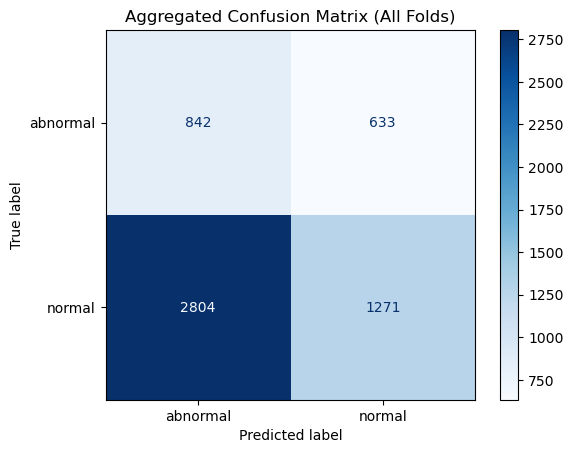

In [ ]:
# Use scikit-learn classification_report for summary
print("--- Aggregated Classification Report (All Folds) ---")
print(classification_report(all_true_labels, all_predictions, target_names=class_names))

# Plot the aggregated confusion matrix
print("\n--- Aggregated Confusion Matrix (All Folds) ---")
cm = confusion_matrix(all_true_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Aggregated Confusion Matrix (All Folds)')
plt.show()

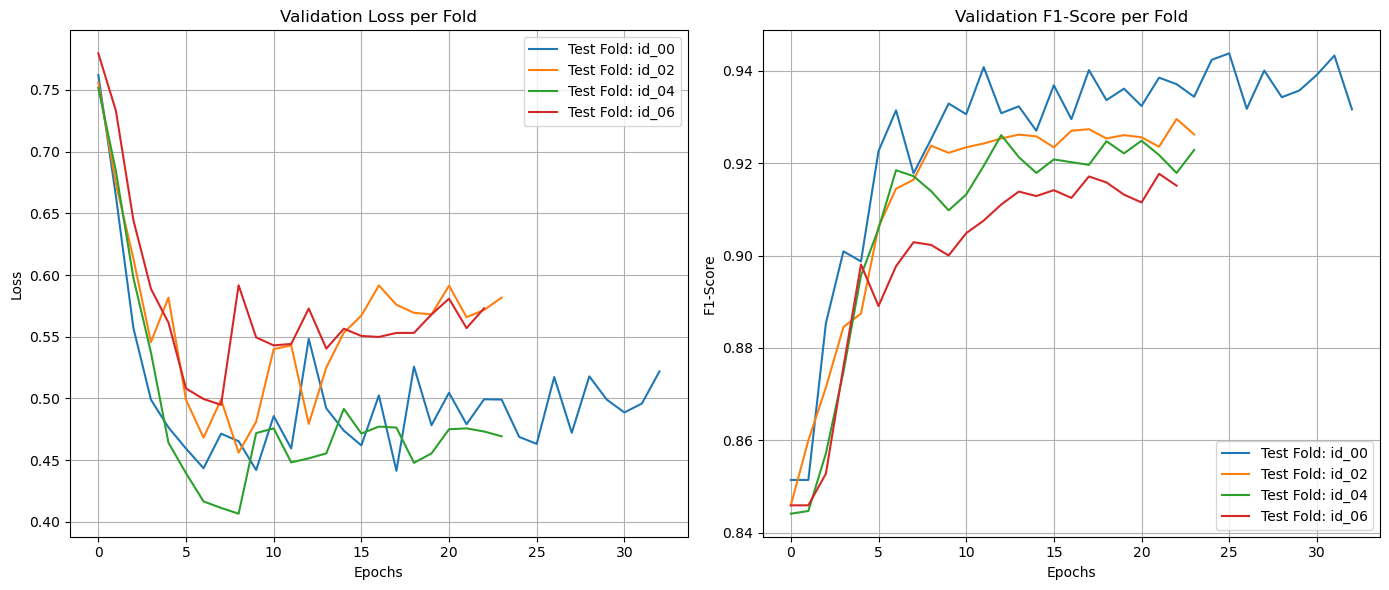

In [8]:
# Plot the validation loss and F1-score for each of the four training runs
plt.figure(figsize=(14, 6))

# Plot Validation Loss
plt.subplot(1, 2, 1)
for test_id, history in all_histories.items():
    plt.plot(history['val_loss'], label=f'Test Fold: {test_id}')
plt.title('Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Validation F1-Score
plt.subplot(1, 2, 2)
for test_id, history in all_histories.items():
    plt.plot(history['val_f1'], label=f'Test Fold: {test_id}')
plt.title('Validation F1-Score per Fold')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()